# The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 Batch

Author: Mohammed Sarfaraz Mansoori

Task-1:- Prediction Using Supervised Machine Learning Model

Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

Dataset :- http://bit.ly/w-data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualization

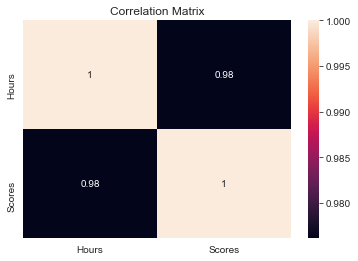

In [10]:
sns.set_style('darkgrid')
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix');

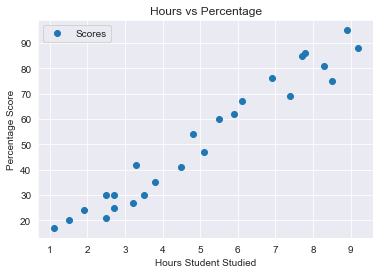

In [11]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Student Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Hours of student studies is directly proportional to its percentage score

there is a strong positive corelation between the hours of student studied and the percentage score

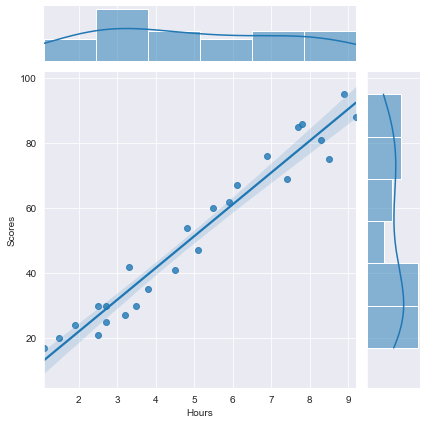

In [12]:
sns.jointplot('Hours','Scores',data=df,kind='reg');

The above figure shows the Scatter plot on the basis of 'Hours of Student studies' as X-axis and 'Percentage Score' as Y-axis


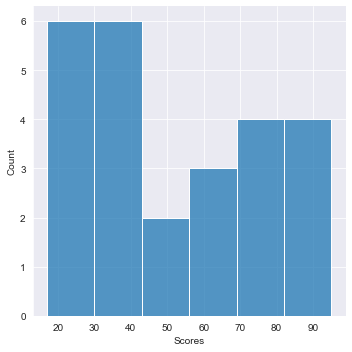

In [13]:
sns.displot(df.Scores)

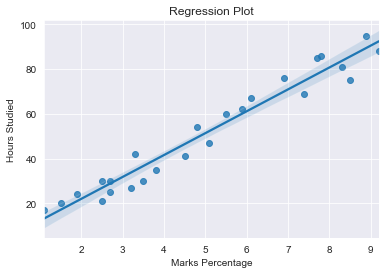

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
sns.regplot(x=df['Hours'], y=df['Scores'])  
plt.title('Regression Plot')  
plt.xlabel('Marks Percentage')  
plt.ylabel('Hours Studied')  
plt.show()
df.corr()

By Visualization

As the Study Hours Increases the chance os scoring high is also increasing. We Could also see that there is a strong positive co-relation the number of hours studied and percentage of score.

## seprating X and Y

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

## Train Test Spliting

In [16]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X, y, random_state=0)

In [17]:
train_X.shape

(18, 1)

In [18]:
train_y.shape

(18,)

In [19]:
val_X.shape

(7, 1)

In [20]:
val_y.shape

(7,)

### Modeling

In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(train_X, train_y)

LinearRegression()

In [22]:
pred_y = regressor.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [23]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


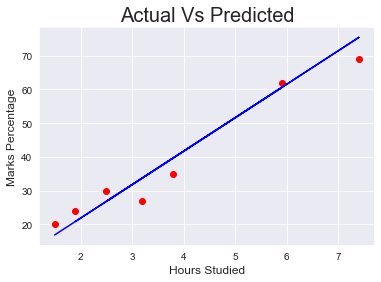

In [24]:
plt.scatter(x=val_X,y=val_y,color='red')
plt.plot(val_X,pred_y,color='blue')
plt.title('Actual Vs Predicted',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

### Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error,r2_score

In [26]:
print('Mean Absolute Error: ',mean_absolute_error(val_y,pred_y))

Mean Absolute Error:  4.130879918502486


In [27]:
print('R2 Score is :',r2_score(val_y,pred_y))

R2 Score is : 0.9367661043365055


### Prediciton Of Percentage Based on Hours he/she has studied

In [28]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


In [29]:
hours = [8]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 81.466


In [30]:
hours = [5]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 51.641


In [31]:
hours = [4.5]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 46.67



 #### According to given problem statement if student studies for 9.25 hours he/she will likely score 93.893% percentage

#### According to given problem statement if student studies for 8 hours hours he/she will likely score 81.466% percentage

#### According to given problem statement if student studies for 5 hours hours he/she will likely score 51.64% percentage

#### According to given problem statement if student studies for 4.5 hours hours he/she will likely score 46.67% percentage 